#Multi-Linear regression

#Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load the dataset

In [3]:
data = pd.read_csv('car.csv')


# Preview the dataset


In [4]:
print(data.head())

   Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
0  2010              72000          3             0           1    26.60   
1  2015              41000          2             0           1    19.67   
2  2012              85000          2             1           2    15.00   
3  2014             110000          2             0           1    13.50   
4  2016              58950          2             0           1    25.80   

   Engine   Power  Seats  Price  
0     998   58.16      5   1.75  
1    1582  126.20      5  12.50  
2    2179  115.00      5  17.50  
3    2477  175.56      7  15.00  
4    1498   98.60      5   5.40  


# Preprocess the data
# Handling categorical variables by converting them into dummy variables

In [10]:
data = pd.get_dummies(data, drop_first=True)

# Define features (X) and target (y)


In [9]:
X = data.drop('Price', axis=1)
y = data['Price']

# Split the dataset into training and testing sets


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Multiple Linear Regression model


In [12]:
model = LinearRegression()


# Train the model


In [13]:
model.fit(X_train, y_train)

LinearRegression()

# Make predictions on the test set


In [14]:
y_pred = model.predict(X_test)

# Evaluate the model

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
# Optional: Compare actual vs predicted prices
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


Mean Squared Error: 79.52966279558412
R-squared: 0.470854376514395
      Actual  Predicted
856     1.90   6.258824
3657    4.50   2.908405
4602    4.75   6.423931
4368   47.50  28.817469
3868    2.90   1.499469


# Residual Plot


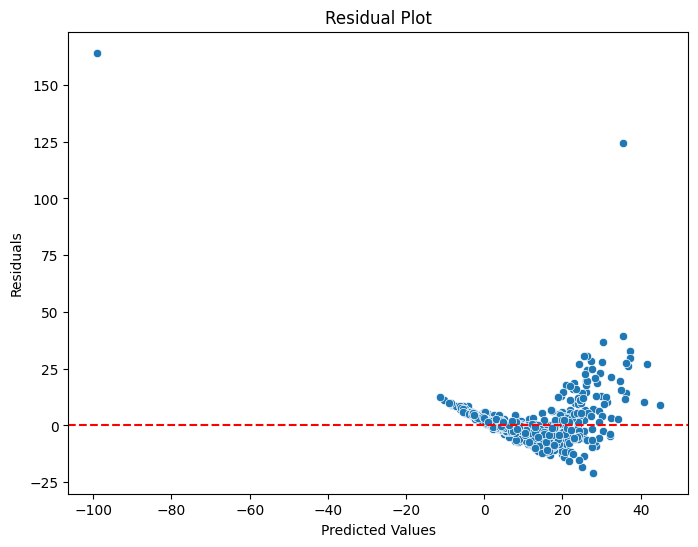

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


# Actual vs Predicted Prices

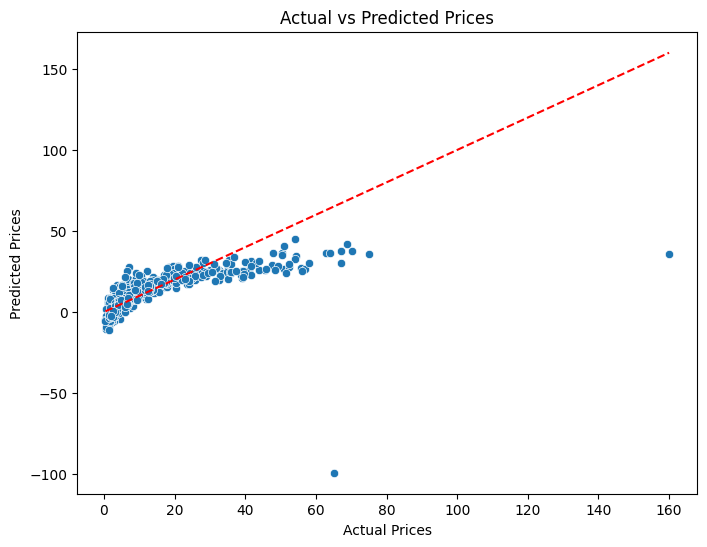

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


# Coefficient Plot (Feature Importance)

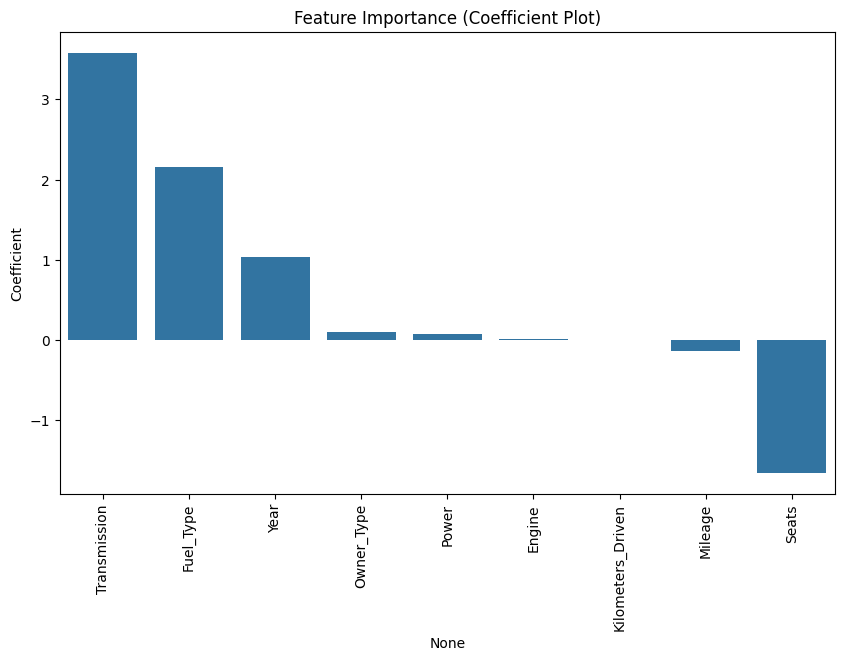

In [19]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
plt.xticks(rotation=90)
plt.title('Feature Importance (Coefficient Plot)')
plt.show()


#EDA

# 1. Summary Statistics





In [24]:
print("Summary Statistics:\n", data.describe())

Summary Statistics:
               Year  Kilometers_Driven    Fuel_Type  Transmission   Owner_Type  \
count  4970.000000       4.970000e+03  4970.000000   4970.000000  4970.000000   
mean   2013.366600       5.904794e+04     1.554930      0.286117     1.200201   
std       3.239673       9.928827e+04     0.519591      0.451990     0.453026   
min    1998.000000       1.710000e+02     1.000000      0.000000     1.000000   
25%    2011.000000       3.400000e+04     1.000000      0.000000     1.000000   
50%    2014.000000       5.300000e+04     2.000000      0.000000     1.000000   
75%    2016.000000       7.300000e+04     2.000000      1.000000     1.000000   
max    2019.000000       6.500000e+06     3.000000      1.000000     4.000000   

           Mileage       Engine        Power        Seats        Price  
count  4970.000000  4970.000000  4970.000000  4970.000000  4970.000000  
mean     18.289789  1620.619718   115.507487     5.279276     9.426809  
std       4.148978   595.62153

# 2. Missing Values Analysis


In [25]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


# 1. Correlation Matrix (for numerical features)


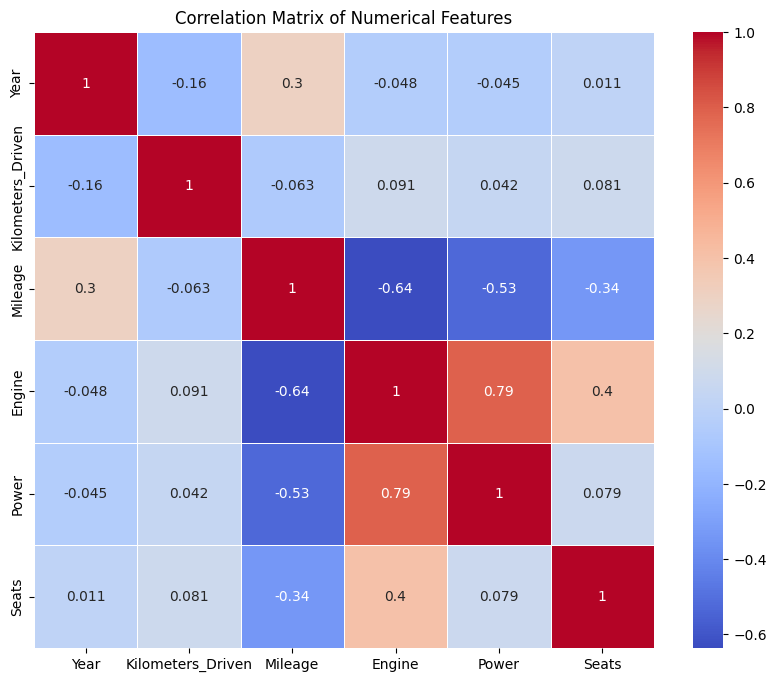

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('car.csv')

plt.figure(figsize=(10, 8))
corr_matrix = data[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 2. Pair Plot (Numerical Features)


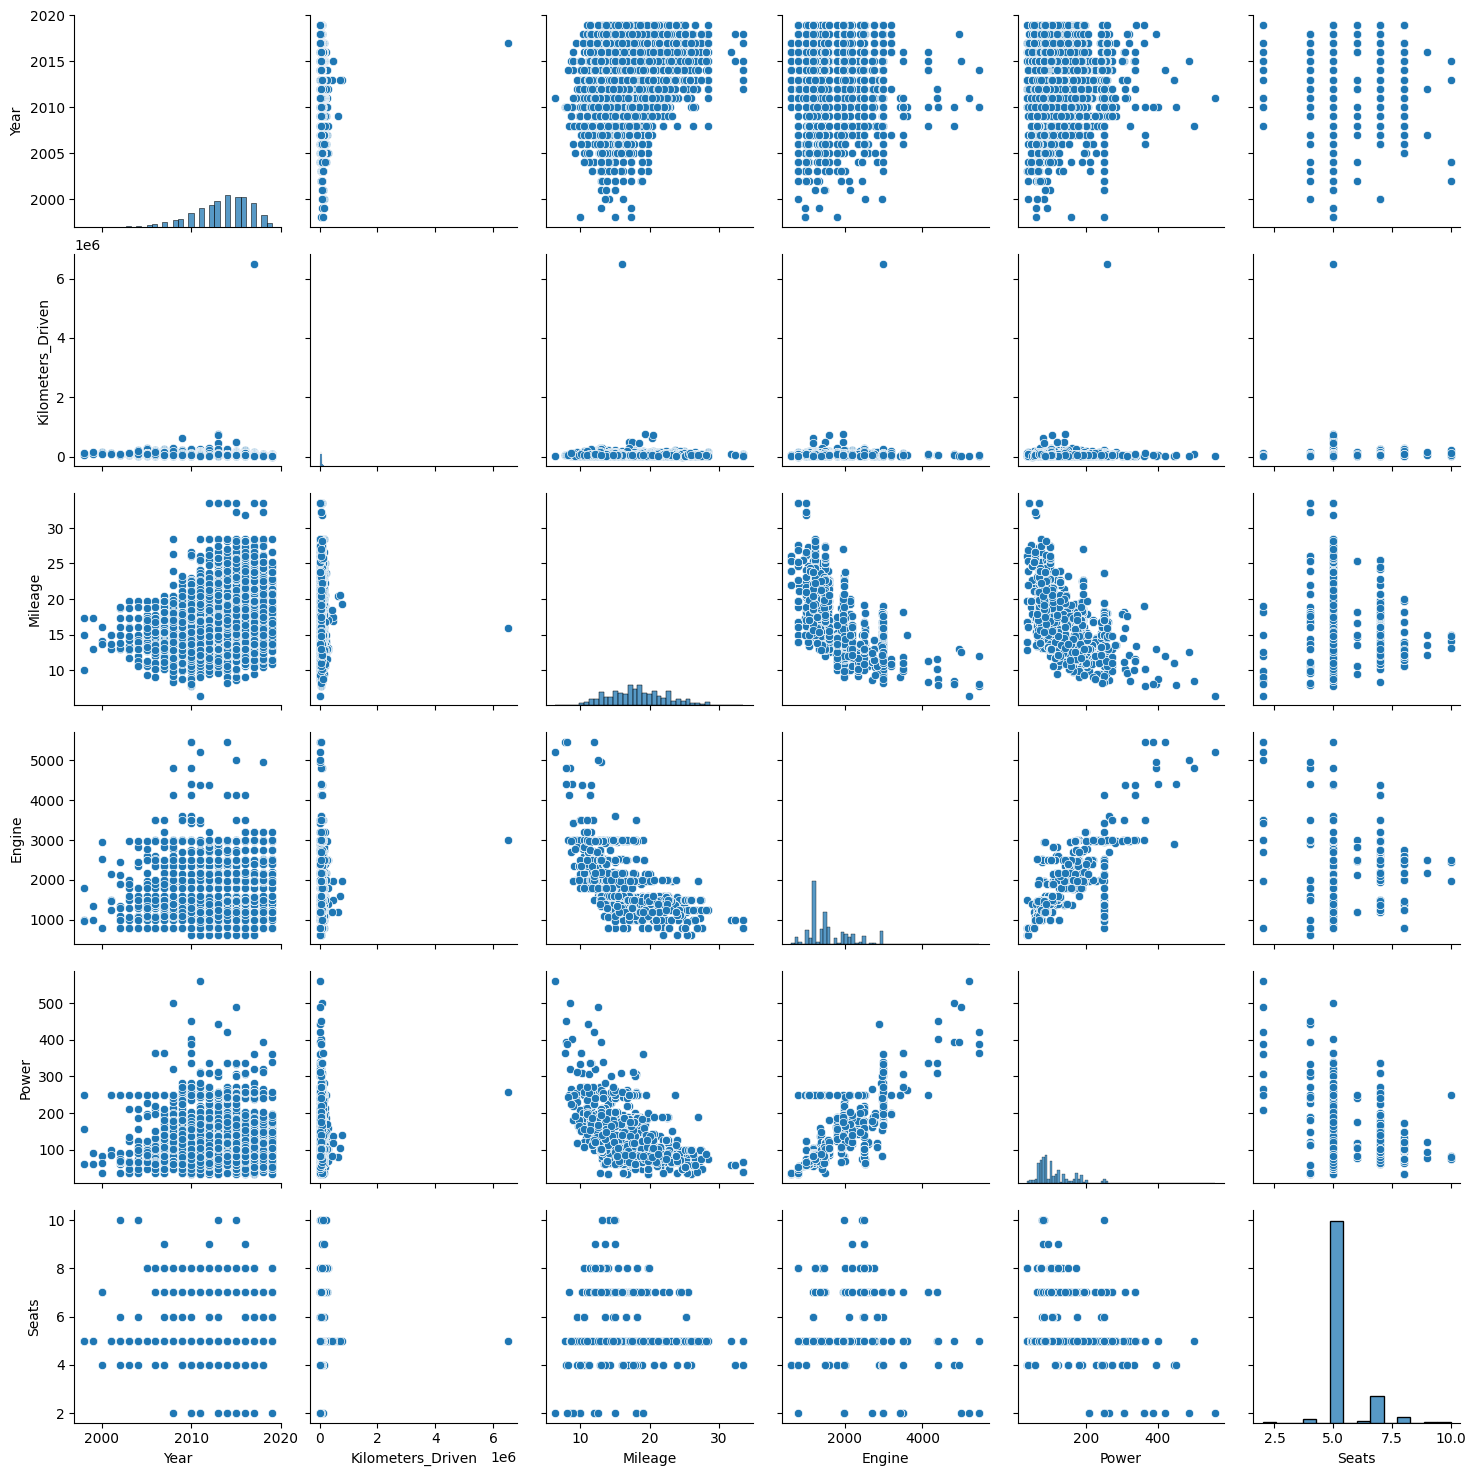

In [27]:
sns.pairplot(data[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']])
plt.show()

#Box plot

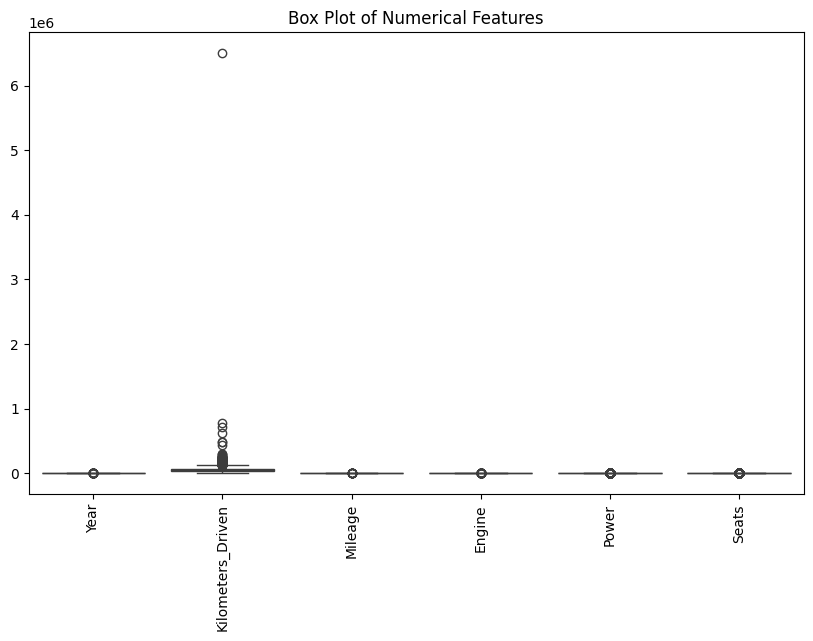

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']])
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Features')
plt.show()

# 4. Count Plots (for categorical features)


In [29]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

# Plot for Fuel_Type


Text(0.5, 1.0, 'Distribution of Fuel Type')

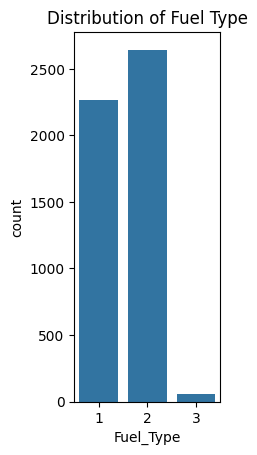

In [30]:
plt.subplot(1, 3, 1)
sns.countplot(x='Fuel_Type', data=data)
plt.title('Distribution of Fuel Type')


# Plot for Transmission

Text(0.5, 1.0, 'Distribution of Transmission Type')

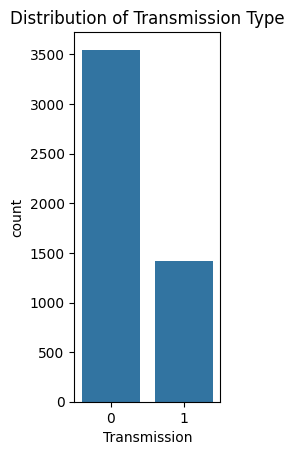

In [31]:
plt.subplot(1, 3, 2)
sns.countplot(x='Transmission', data=data)
plt.title('Distribution of Transmission Type')

# Plot for Owner_Type

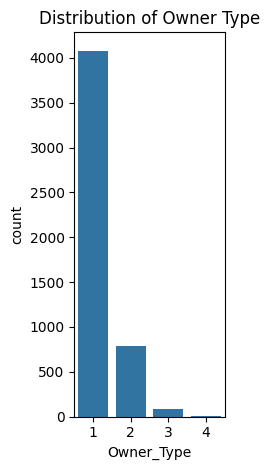

In [32]:
plt.subplot(1, 3, 3)
sns.countplot(x='Owner_Type', data=data)
plt.title('Distribution of Owner Type')

plt.tight_layout()
plt.show()


#Explanation of Visualizations:
**Correlation Matrix**: Helps identify strong linear relationships between numerical features (e.g., Year, Kilometers_Driven, Mileage, etc.).  
**Pair Plot**: Provides scatter plots for all numerical features and histograms to visualize individual distributions. It helps identify relationships and correlations.  
**Box Plot**: Helps detect outliers in numerical features. If any feature has extreme values, they will be visible as points outside the boxes.  
**Count Plots**: These plots show the distribution of categorical features (e.g., Fuel_Type, Transmission, Owner_Type). This helps understand the proportion of different categories in the dataset.